In [54]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from warnings import simplefilter
simplefilter('ignore')

%matplotlib inline

In [55]:
# Our objective is to build a ml model to predict the probability of a person 
# having a stroke

#### Data Exploration

In [56]:
# load datasets
df_train = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')

FIG_DIR = "../reports/figures"

In [57]:
df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [58]:
df_train.shape

(15304, 12)

In [59]:
# overview of data types of different column featues
df_train.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [60]:
# dropping id column
df_train.drop(["id"], axis = 1, inplace = True)
df_test.drop(["id"], axis = 1, inplace = True)

In [61]:
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [62]:
# extracting numeric and categorical features
numeric_features = df_train.select_dtypes(exclude='object').columns
categorical_features = df_train.select_dtypes(include='object').columns

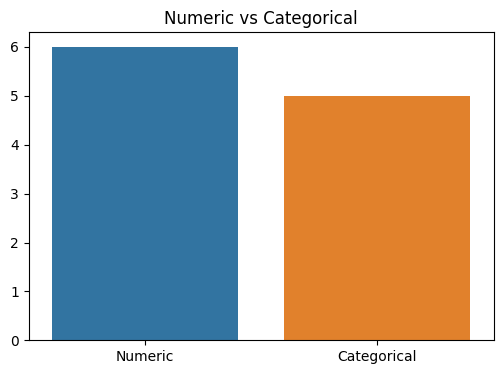

<Figure size 640x480 with 0 Axes>

In [63]:
# visualize the ratio of numeric and categorical features
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=['Numeric', 'Categorical'], y=[numeric_features.shape[0], 
                                                 categorical_features.shape[0]])
ax.set_title('Numeric vs Categorical', fontdict={'fontsize':12})
plt.show()

plt.savefig(os.path.join(FIG_DIR, "ratio_of_num_and_cat_features.png"))

There are **6** numeric and **5** categorical features

In [64]:
# missing values
df_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [65]:
# having a statistical view over the dataset and look for outliers
df_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


There doesn't seem to be any extreme values in the dataset.

#### Explanatory Data Analysis (EDA)

#### **Looking at features individually**

#### *Lets look at **gender** feature*

In [88]:
# gender count
df_train.gender.value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [118]:
# Add colors for barplot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 

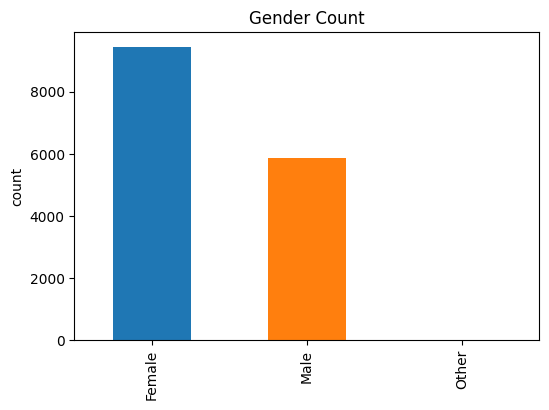

In [115]:
# gender count visualization
plt.figure(figsize=(6, 4))
df_train.gender.value_counts(dropna=False).plot(kind='bar', color=colors)
plt.ylabel('count')
plt.title("Gender Count")

plt.savefig(os.path.join(FIG_DIR, "gender_count.png"))

Most of observations are Female following by Male, and there is only one observation having a gender of ***Other***.

#### *Lets look at **age** feature*

In [96]:
# age info
df_train['age'].describe()

count    15304.000000
mean        41.417708
std         21.444673
min          0.080000
25%         26.000000
50%         43.000000
75%         57.000000
max         82.000000
Name: age, dtype: float64

The minimum age is **0.08**, and the maximum age is **82** years.

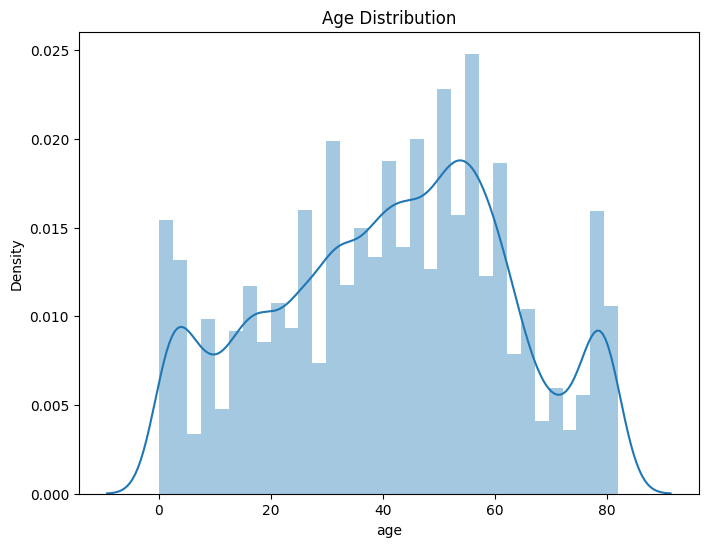

In [100]:
# Age distribution visualization
plt.figure(figsize=(8, 6))
sns.distplot(df_train.age.dropna())
plt.title("Age Distribution")

plt.savefig(os.path.join(FIG_DIR, "age_distribution_freq.png"))

A major number of observations are between their 40's and 60's. Also, the *Age* distribution does not show much bias.

#### *Lets look at **hypertension** feature*

In [101]:
df_train.hypertension.value_counts()

0    14543
1      761
Name: hypertension, dtype: int64

There are **2** values corresponding to *hypertension*, 0 & 1, with 0 being negative and 1 being a positive case.

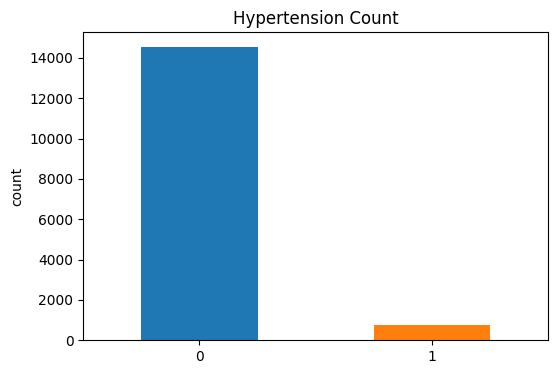

In [114]:
# hypertension count visualization
plt.figure(figsize=(6, 4))
df_train.hypertension.value_counts(dropna=False).plot(kind='bar', color=colors)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title("Hypertension Count")

plt.savefig(os.path.join(FIG_DIR, "hypertension_count.png"))

The number of obversations not having hypertension (*14543*) is much higher than that of observations with a positive hypertension (*761*).

#### *Lets look at **heart_disease** feature*

In [107]:
df_train.heart_disease.value_counts()

0    14947
1      357
Name: heart_disease, dtype: int64

There are 2 values corresponding to heart_disease, 0 & 1, with 0 being negative and 1 being a positive case.

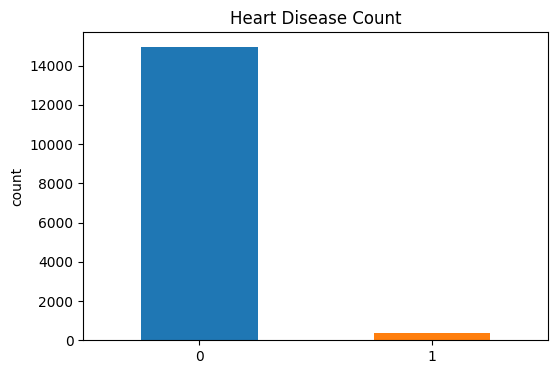

In [113]:
# heart_disease count visualization
plt.figure(figsize=(6, 4))
df_train.heart_disease.value_counts(dropna=False).plot(kind='bar', color=colors)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title("Heart Disease Count")

plt.savefig(os.path.join(FIG_DIR, "heart_disease_count.png"))

The number of obversations not having heart disease (*14947*) is much higher than that of observations with a positive hypertension (*357*).

#### *Lets look at **ever_married** feature*

In [109]:
df_train.ever_married.value_counts()

Yes    10385
No      4919
Name: ever_married, dtype: int64

There are 2 values corresponding to ever_married, Yes & No, with No being negative and Yes being positive.

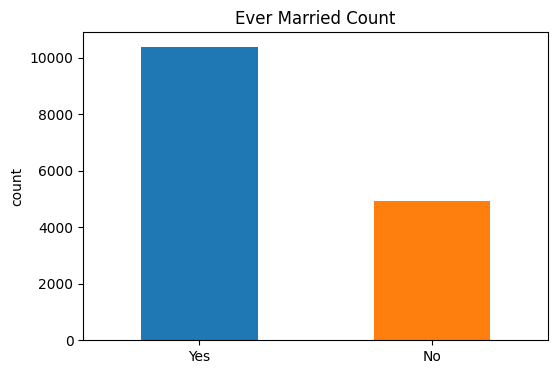

In [112]:
# ever_married count visualization
plt.figure(figsize=(6, 4))
df_train.ever_married.value_counts(dropna=False).plot(kind='bar', color=colors)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title("Ever Married Count")

plt.savefig(os.path.join(FIG_DIR, "ever_married_count.png"))

The number of obversations who have evered married (*10385*) is much higher than that of observations who have not married (*4919*).

#### *Lets look at **work_type** feature*

In [116]:
df_train.work_type.value_counts()

Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64

There are 4 values corresponding to *work_type* and they are pretty self-explaining

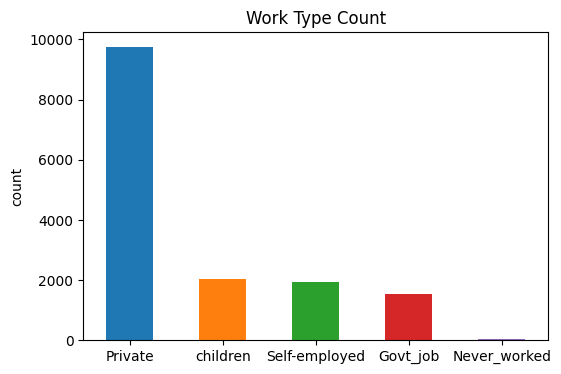

In [119]:
# work_type count visualization
plt.figure(figsize=(6, 4))
df_train.work_type.value_counts(dropna=False).plot(kind='bar', color=colors)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title("Work Type Count")

plt.savefig(os.path.join(FIG_DIR, "work_type_count.png"))

The above charts and figures are pretty self-explaining and vivid.

#### *Lets look at **Residence_type** feature*

In [120]:
df_train.Residence_type.value_counts()

Rural    7664
Urban    7640
Name: Residence_type, dtype: int64

There are 2 values corresponding to *Residence_type*, **Urban** & **Rural**

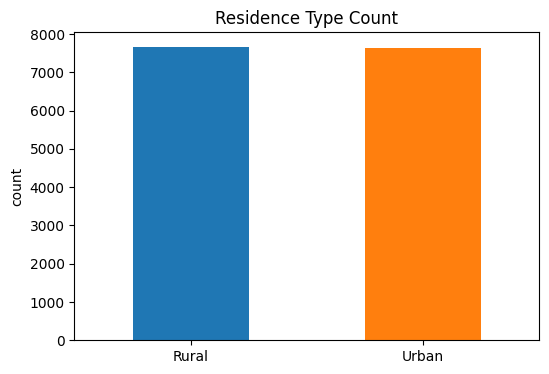

In [121]:
# Residence_type count visualization
plt.figure(figsize=(6, 4))
df_train.Residence_type.value_counts(dropna=False).plot(kind='bar', color=colors)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title("Residence Type Count")

plt.savefig(os.path.join(FIG_DIR, "Residence_type_count.png"))

*Urban* and *Rural* values of *Residence_type* are distributed almost equally, which is state-of-the-art in ML.

#### *Lets look at **avg_glucose_level** feature*

In [123]:
df_train['avg_glucose_level'].describe()

count    15304.000000
mean        89.039853
std         25.476102
min         55.220000
25%         74.900000
50%         85.120000
75%         96.980000
max        267.600000
Name: avg_glucose_level, dtype: float64

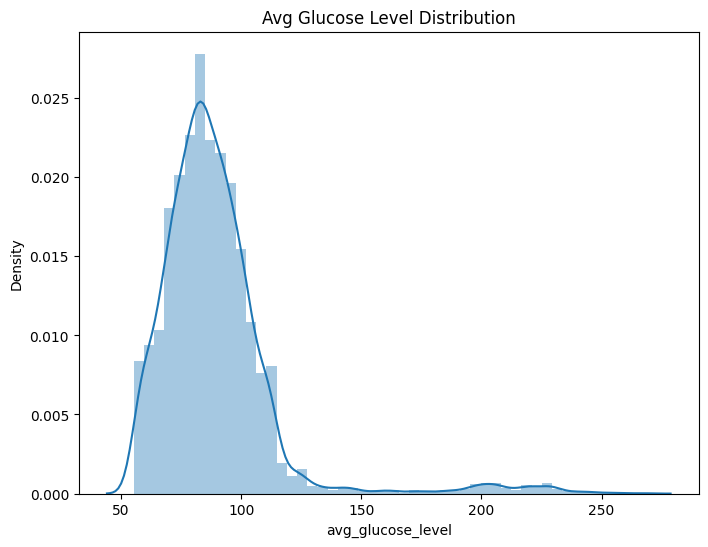

In [128]:
# avg_glucose_level distribution visualization
plt.figure(figsize=(8, 6))
sns.distplot(df_train.avg_glucose_level.dropna())
plt.title("Avg Glucose Level Distribution")

plt.savefig(os.path.join(FIG_DIR, "avg_glucose_level_distribution.png"))

The *avg_glucose_level* is not distributed equally; the majority of observations have an average Glucose level of 60-120, but very few of them have that of 120-250.

#### *Lets look at **bmi** feature*

In [126]:
df_train['bmi'].describe()

count    15304.000000
mean        28.112721
std          6.722315
min         10.300000
25%         23.500000
50%         27.600000
75%         32.000000
max         80.100000
Name: bmi, dtype: float64

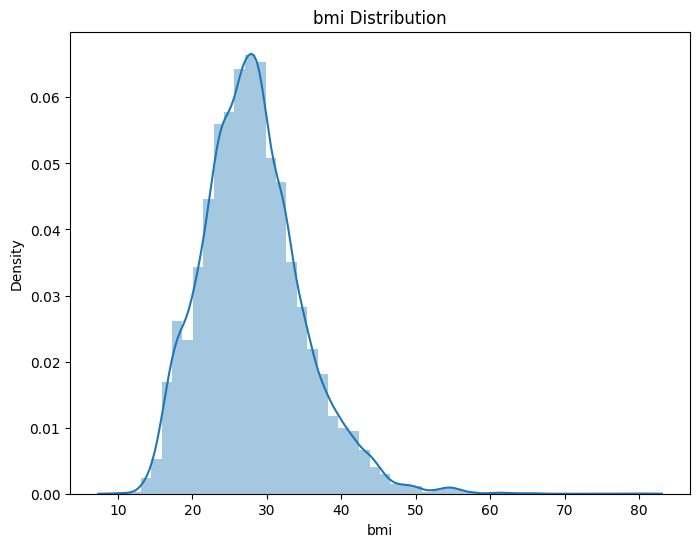

In [127]:
# bmi distribution visualization
plt.figure(figsize=(8, 6))
sns.distplot(df_train.bmi.dropna())
plt.title("bmi Distribution")

plt.savefig(os.path.join(FIG_DIR, "bmi_distribution.png"))

The *bmi* is not distributed equally; the majority of observations have a *bmi* of 25-35, but very few of them have that of 50-80, which may be troublesome.

#### *Lets look at **smoking_status** feature*

In [129]:
df_train.smoking_status.value_counts()

never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64

There are 4 values corresponding to *smoking_status*, 'never smoked', 'formerly smoked', 'Unknown' and 'smokes'.

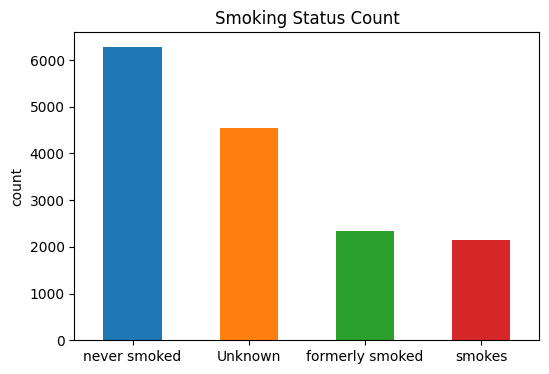

In [133]:
# smoking_status count visualization
plt.figure(figsize=(6, 4))
df_train.smoking_status.value_counts(dropna=False).plot(kind='bar', color=colors)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title("Smoking Status Count")

plt.savefig(os.path.join(FIG_DIR, "smoking_status_count.png"))

#### *Lets look at the target variable*

In [134]:
df_train.stroke.value_counts()

0    14672
1      632
Name: stroke, dtype: int64

1 = Positive case, 0 = Negative case

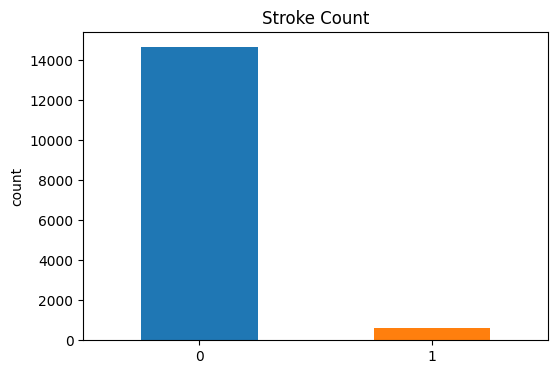

In [135]:
# target variable count visualization
plt.figure(figsize=(6, 4))
df_train.stroke.value_counts(dropna=False).plot(kind='bar', color=colors)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title("Stroke Count")

plt.savefig(os.path.join(FIG_DIR, "target_variable_count.png"))

The target variable shows extreme **bias** which may effect an ml model negatively. The number of **1's (632)** is much lower than the number of **0's (14672)**.

#### See the relationships among features [and the target variable]

##### We will first examine the effects of categorical features on the target variable, and then, we will through numeric features.

**1. Gender**

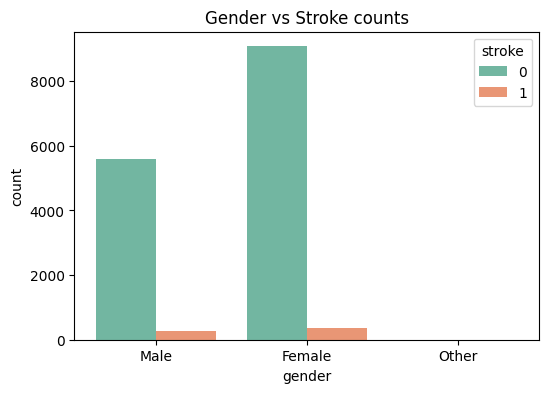

In [160]:
# How gender feature effects the target variable
plt.figure(figsize=(6, 4))

sns.set_palette('Set2')

ax = sns.countplot(x='gender', hue='stroke', data=df_train)
ax.set_title('Gender vs Stroke counts')
plt.plot()

plt.savefig(os.path.join(FIG_DIR, "gender_vs_stroke_count.png"))

In [147]:
# gender vs stroke
pd.crosstab(
    index=df_train['gender'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
gender,,
Female,0.961042,0.038958
Male,0.954926,0.045074
Other,1.000000,0.000000
All,0.958704,0.041296


As we can see from the above chart and figure, gender alone does have much effects of the stroke value. **That is, 96% females and 95% of males are with a stroke value of 0**.

**2. Ever Married**

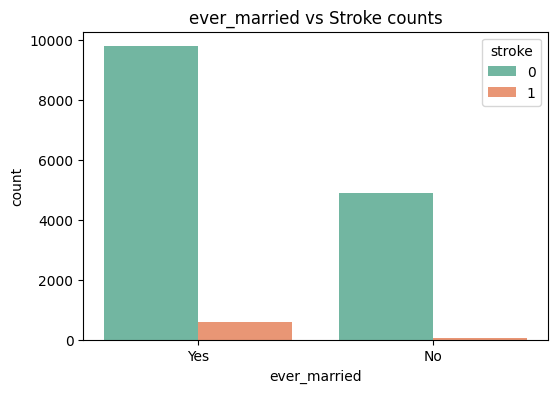

In [165]:
# How ever_married feature the target variable
plt.figure(figsize=(6, 4))

sns.set_palette('Set2')

ax = sns.countplot(x='ever_married', hue='stroke', data=df_train)
ax.set_title('ever_married vs Stroke counts')
plt.plot()

plt.savefig(os.path.join(FIG_DIR, "ever_married_vs_stroke_count.png"))

In [149]:
# Ever Married vs stroke
pd.crosstab(
    index=df_train['ever_married'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
ever_married,,
No,0.991665,0.008335
Yes,0.943091,0.056909
All,0.958704,0.041296


Those who have ever married have a higher chance of having a stroke than those who haven't ever married.

**3. Work Type**

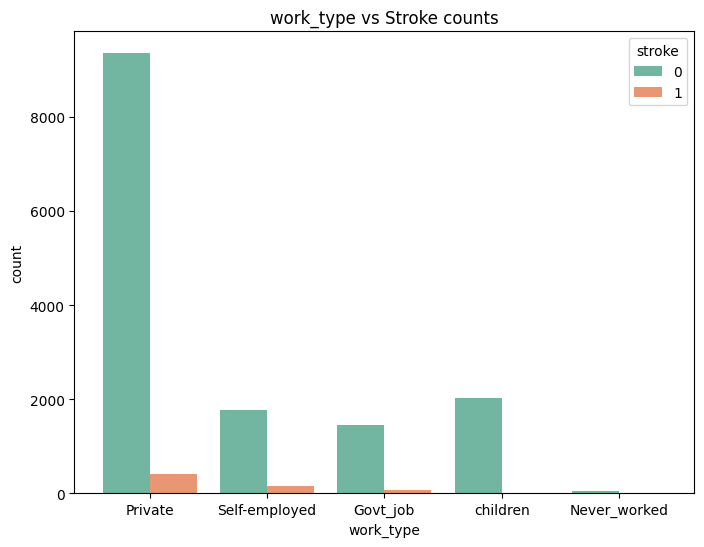

In [166]:
# How work_type feature the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(x='work_type', hue='stroke', data=df_train)
ax.set_title('work_type vs Stroke counts')
plt.plot()

plt.savefig(os.path.join(FIG_DIR, "work_type_vs_stroke_count.png"))

In [152]:
# Work Type vs stroke
pd.crosstab(
    index=df_train['work_type'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
work_type,,
Govt_job,0.954990,0.045010
Never_worked,1.000000,0.000000
Private,0.958573,0.041427
Self-employed,0.918515,0.081485
children,0.999509,0.000491
All,0.958704,0.041296


Those who have never worked has the highest safety probability for having a stroke, wherease those who are self-employed has the highest risk probability for having a stroke. This feature has a higher effect on the target variable.

**4. Residence_type**

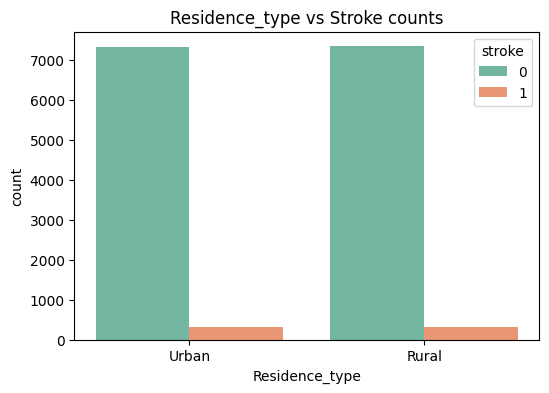

In [167]:
# How Residence_type feature the target variable
plt.figure(figsize=(6, 4))

sns.set_palette('Set2')

ax = sns.countplot(x='Residence_type', hue='stroke', data=df_train)
ax.set_title('Residence_type vs Stroke counts')
plt.plot()

plt.savefig(os.path.join(FIG_DIR, "Residence_type_vs_stroke_count.png"))

In [154]:
# Residence_type vs stroke
pd.crosstab(
    index=df_train['Residence_type'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
Residence_type,,
Rural,0.958638,0.041362
Urban,0.958770,0.041230
All,0.958704,0.041296


We may consider removing this feature, Residence_type, since its values' impacts to the target variable are the same. 95.9% of both values are having a stroke value of 0.

**5. Smoking Status**

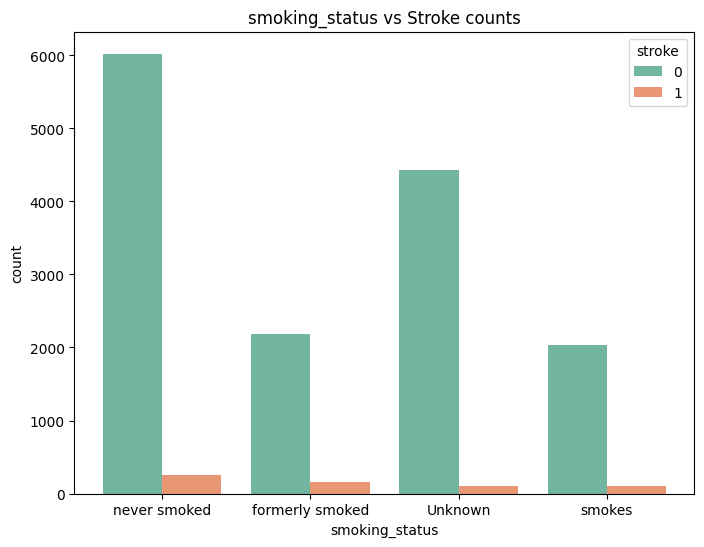

In [168]:
# How smoking_status feature the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(x='smoking_status', hue='stroke', data=df_train)
ax.set_title('smoking_status vs Stroke counts')
plt.plot()

plt.savefig(os.path.join(FIG_DIR, "smoking_status_vs_stroke_count.png"))

In [163]:
# smoking_status vs stroke
pd.crosstab(
    index=df_train['smoking_status'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
smoking_status,,
Unknown,0.976227,0.023773
formerly smoked,0.931964,0.068036
never smoked,0.959083,0.040917
smokes,0.949603,0.050397
All,0.958704,0.041296


*Unknown* & *never smoked* values have lower chance of having a stroke wherease *formerly smoked* and smokes values have higher chance of having a stroke. Those who formerly smoked has the highest change of having a stroke.

**6. Hypertension**

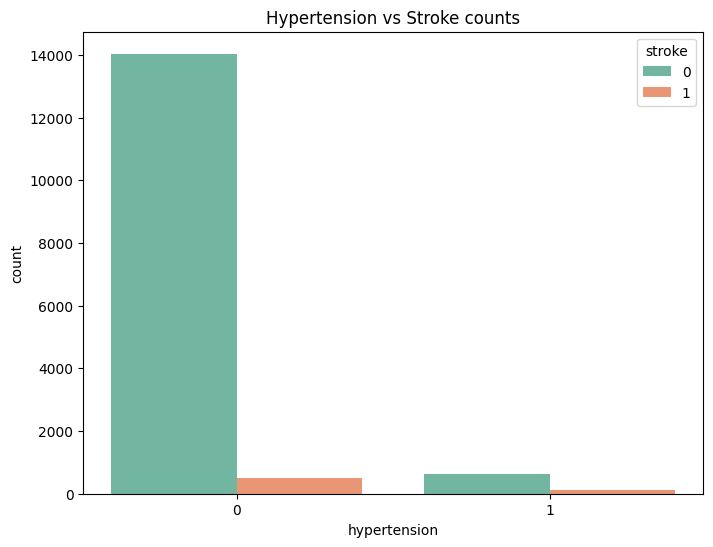

In [169]:
# How hypertension feature the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(x='hypertension', hue='stroke', data=df_train)
ax.set_title('Hypertension vs Stroke counts')
plt.plot()

plt.savefig(os.path.join(FIG_DIR, "hypertension_vs_stroke_count.png"))

In [170]:
# Hypertension vs stroke
pd.crosstab(
    index=df_train['hypertension'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
hypertension,,
0,0.965344,0.034656
1,0.831800,0.168200
All,0.958704,0.041296


Those who are suffering from *hypertension* has a higher chance of having a stroke than those who don't have *hypertension*.

**7. Heart Disease**

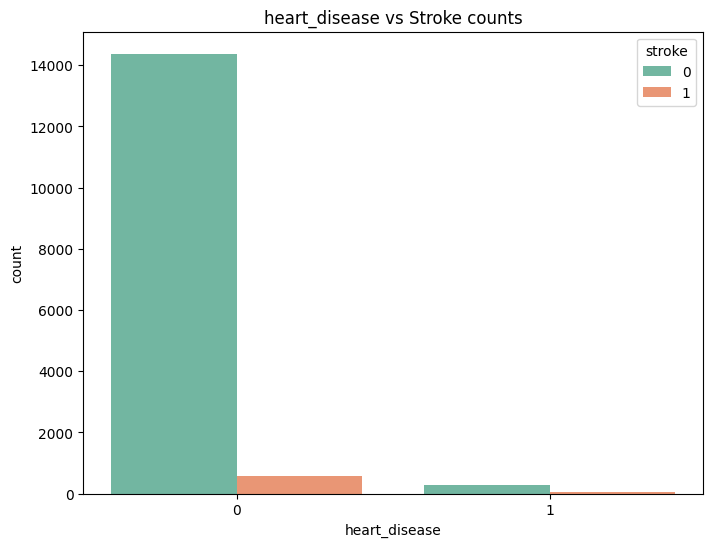

In [171]:
# How heart_disease feature the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(x='heart_disease', hue='stroke', data=df_train)
ax.set_title('heart_disease vs Stroke counts')
plt.plot()

plt.savefig(os.path.join(FIG_DIR, "heart_disease_vs_stroke_count.png"))

In [172]:
# heart_disease vs stroke
pd.crosstab(
    index=df_train['heart_disease'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
heart_disease,,
0,0.962133,0.037867
1,0.815126,0.184874
All,0.958704,0.041296


Those who are suffering from heart disease has a higher chance of having a stroke than those who don't have heart disease.

##### Now let's see the effects of different numeric features on the target variable.

**1. Age**

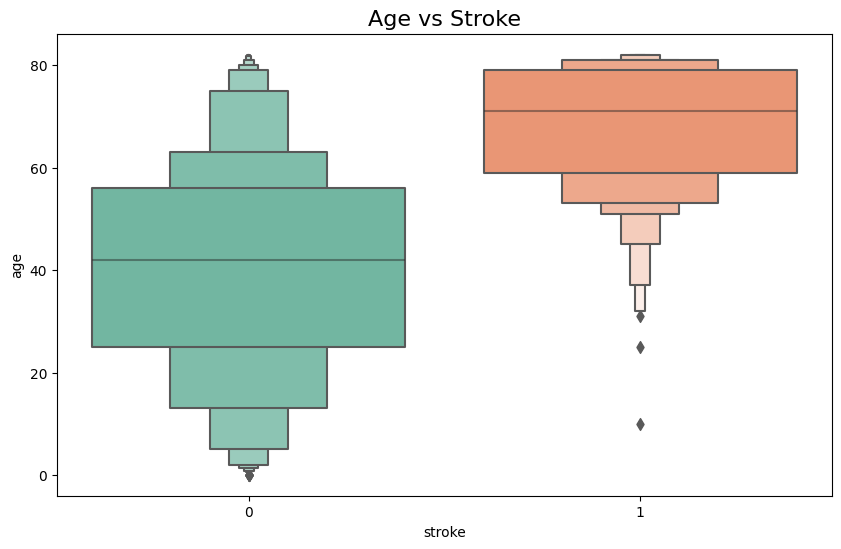

In [173]:
# How age feature effects the target variable
plt.figure(figsize=(10, 6))

sns.set_palette('Set2')

ax = sns.boxenplot(data=df_train, x='stroke', y='age')
ax.set_title('Age vs Stroke', fontdict={'fontsize': 16})
plt.plot()

plt.savefig(os.path.join(FIG_DIR, "age_vs_stroke_count.png"))

We can vividly see that most of observations having a stroke are above 60 wherease most of observations with no stroke is under 60. This feature can be a good predictor.

**2. Average Glucose Level**

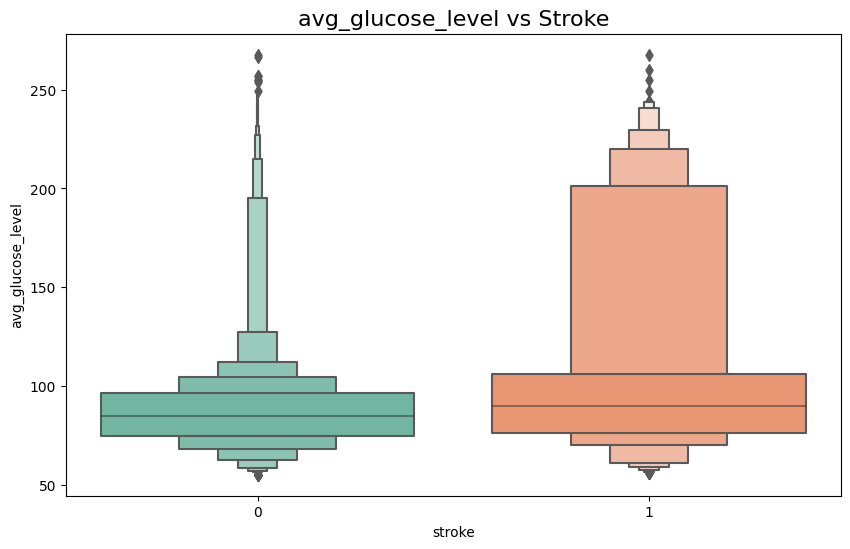

In [174]:
# How avg_glucose_level feature effects the target variable
plt.figure(figsize=(10, 6))

sns.set_palette('Set2')

ax = sns.boxenplot(data=df_train, x='stroke', y='avg_glucose_level')
ax.set_title('avg_glucose_level vs Stroke', fontdict={'fontsize': 16})
plt.plot()

plt.savefig(os.path.join(FIG_DIR, "avg_glucose_level_vs_stroke_count.png"))

Again, the higher the glucose level, the higher the chance of having a stroke.

**3. BMI**

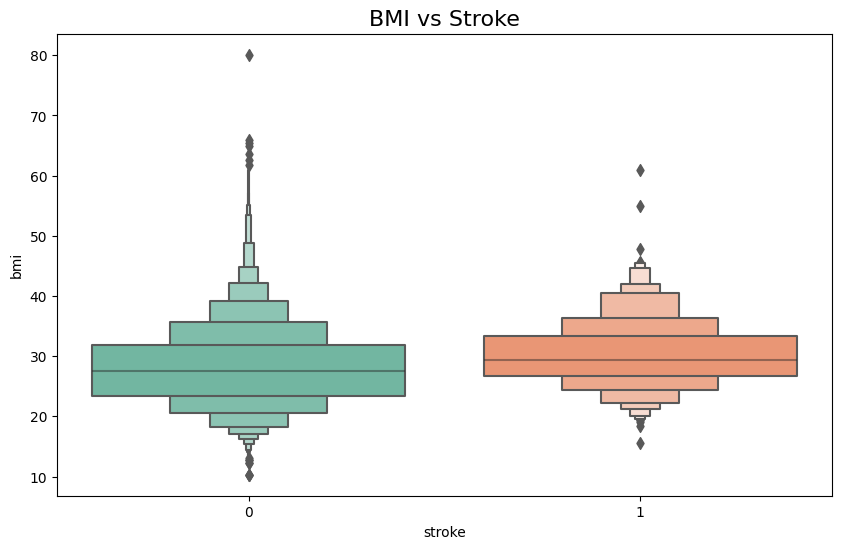

In [175]:
# How bmi feature effects the target variable
plt.figure(figsize=(10, 6))

sns.set_palette('Set2')

ax = sns.boxenplot(data=df_train, x='stroke', y='bmi')
ax.set_title('BMI vs Stroke', fontdict={'fontsize': 16})
plt.plot()

plt.savefig(os.path.join(FIG_DIR, "bmi_vs_stroke_count.png"))

Though many of observations with a negative stroke case have a lower bmi, it does seem to have a huge impact on the target variable because there are some observations who have too high bmi but still have a negative stroke case.

#### Data Preprocessing

In [178]:
# load the original dataset 
df_orig = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv', index_col=0)

Because in the dataset, there are many observations with a stroke value of 0, but a few observations with a stroke value of 1, we will combine only those rows from the original data that have a stroke of 1.

In [179]:
# combine it with the training set
df_orig_stroke_1 = df_orig[df_orig[['stroke']].all(1)]
df_train = df_train.append(df_orig_stroke_1)
df_train.shape

(15553, 11)

In [180]:
# let's combine the training and the test sets for consistancy purposes
df = df_train.append(df_test)

# reset id since the original dataset also begins with 0
df.index = df.reset_index().index

df.shape

(25757, 11)

In [181]:
# 1- remove 'Residence_type' and 'bmi' features
df.drop(['Residence_type', 'bmi'], axis=1, inplace=True)

In [182]:
# 2- encode categorical variables to numbers

# gender
df['gender'] = df['gender'].map({
    'Male': 0,
    'Female': 1,
    'Other': 2
}).astype('int')

# ever_married
df['ever_married'] = df['ever_married'].map({
    'Yes': 1,
    'No': 0
}).astype('int')

# work_type
df['work_type'] = df['work_type'].map({
    'Private':0,
    'Self-employed': 1,
    'Govt_job': 2,
    'children': 3,
    'Never_worked': 4
}).astype('int')

# smoking_status
df['smoking_status'] = df['smoking_status'].map({
    'never smoked' : 0,
    'formerly smoked': 1,
    'smokes': 2,
    'Unknown': 3
}).astype('int')

df.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
avg_glucose_level    float64
smoking_status         int32
stroke               float64
dtype: object

In [183]:
# 3- data normalization on numeric features (age & avg_glucose_level) using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['age', 'avg_glucose_level']] = scaler.fit_transform(df[['age', 'avg_glucose_level']])
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,0,0.340820,0,0,1,0,0.112686,0,0.0
1,0,0.401855,0,0,1,0,0.107654,1,0.0
2,1,0.511719,0,0,1,0,0.221032,3,0.0
3,0,0.682617,0,0,1,0,0.045010,0,0.0
4,1,0.291992,0,0,0,0,0.084203,0,0.0


In [184]:
# seperate the training set and the test set from each other.
df_train = df.loc[:df_train.shape[0]-1]
df_test = df.loc[df_train.shape[0]:].iloc[:, :-1]

#### Modeling

##### **Model Construction** 

In [185]:
# separate the features from the target variable
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

In [186]:
# training a model
from xgboost import XGBRFClassifier

model = XGBRFClassifier(n_estimators=1000)
model.fit(X, y)
print('The model has been trained!')

The model has been trained!


##### **Model Utilization and Submission** 